<a href="https://colab.research.google.com/github/juliachambers2001/TensorFlow-Image-Classification-Dogs-Cats-/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.8.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.23.0.

In [3]:
import tensorflow as tf
import os

In [4]:
#Prevent OOM errors by setting up the GPU Memory
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

**Remove Dodgy Images**

In [5]:
import cv2
import imghdr

/tmp/ipython-input-5-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
"My Drive/Colab Notebooks/TensorFlow/Data"

'My Drive/Colab Notebooks/TensorFlow/Data'

In [9]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/TensorFlow/Data"

In [10]:
os.listdir(data_dir)

['Dogs', 'Cats', 'test_data']

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

IW-qqvvL8c2kqZlQd-rVJMecTcpycODP0oqh12Oa9hzH-Mz_DapPAZ5Gt4Es.jpeg
Untitled-design-2025-02-13T124301-602-1500x1031.png
2HgRZepGBWezPH8etulnl3p6F2aRRdzmLMtstWfdlCcdY82pjbdrLLmCfLEk.jpeg
hip-dysplasia-in-dogs.jpg
Maltese-original.jpeg
Mt_k1_B9zYX1-EXpnF3Fsq9gqh-ZmjsMMKUq6emk4wXd8fKv3mwoG0zFJNed.jpeg
The_Benefits_of_Beef_Spleen_For_Dogs.jpg
Three-Australian-Shepherd-puppies-sitting-in-a-field.jpg
iStock-1052880600.jpg
small-dog-owners-1.jpg
252374-004-4EFDE7CC.jpg
small-fluffy-dog-breeds-maltipoo-66300ad363389.jpg
smart-breeds-golden-retriever.jpg
helena-lopes-S3TPJCOIRoo-unsplash-scaled.jpg
teddy-6617f86ca5b27.jpg
dog_brains_2500.png
why-do-dogs-adopt-other-animals-540x300.png
Beth_Gruber_-_daycare-dog-playing.jpg
Golden-Retrievers-dans-pet-care.jpeg
c529a263-8ffa-4521-a47e-babb146f1e6b.png
small-dog-breeds-universal.jpg
labrador-retriever-dans-pet-care.jpeg
domestic-dog.jpg
golden-retriever-puppy.jpg
bonding_16x9-1710956789657.jpg
SeeingEyeDogs_iStock_000018434508_Medium-1024x683.jpg
iSt

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/Colab Notebooks/TensorFlow/Data/Cats/groei-it-charlottexangie.gif
Image not in ext list /content/drive/MyDrive/Colab Notebooks/TensorFlow/Data/Cats/pexels-breanne-sartori-65006-1-.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/TensorFlow/Data/Cats/8989851909_9b78222fbb.jpg


**Load Data**

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  # You can adjust the image size
    batch_size=32          # You can adjust the batch size
)

Found 177 files belonging to 3 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
#Get another batch from the iterator
batch = data_iterator.next()

In [17]:
batch[0].shape

(32, 224, 224, 3)

In [18]:
#Class 1 = Dogs
#Class 0 = Cats
batch[1]

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

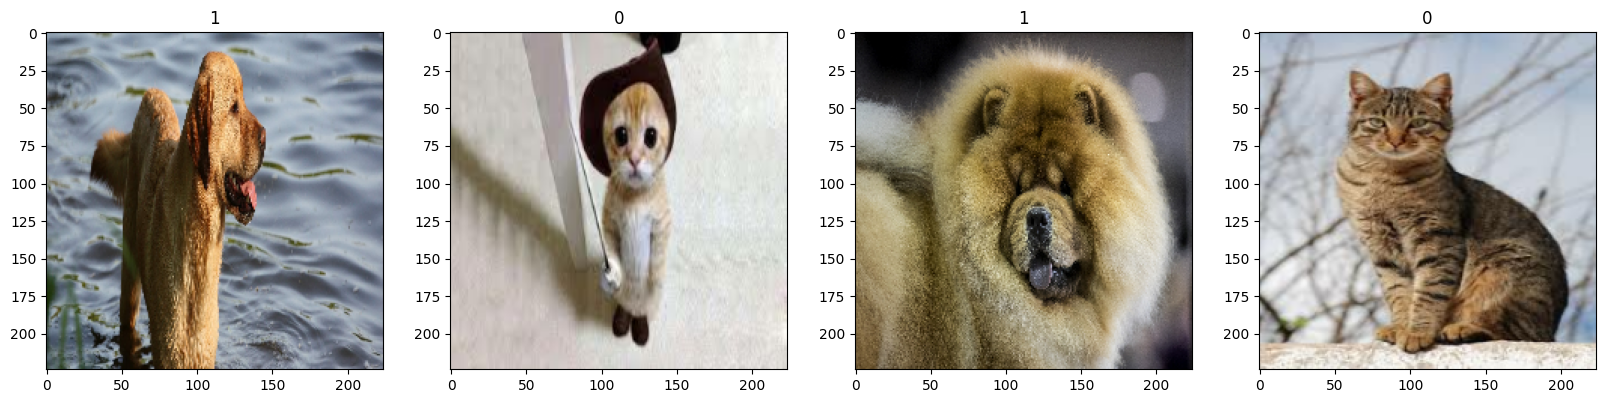

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Preprocess Data**

Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[0.8217793 , 0.8755609 , 0.8455876 ],
          [0.7920981 , 0.8428546 , 0.77313113],
          [0.78547174, 0.84684813, 0.7294199 ],
          ...,
          [0.7983377 , 0.83534217, 0.6925922 ],
          [0.821703  , 0.86495405, 0.73926085],
          [0.8288287 , 0.86930525, 0.7486819 ]],
 
         [[0.84687126, 0.90056837, 0.8641926 ],
          [0.7889181 , 0.8411915 , 0.7585052 ],
          [0.7437056 , 0.81618524, 0.68251866],
          ...,
          [0.7763205 , 0.8160968 , 0.6645288 ],
          [0.80884516, 0.8557083 , 0.71312016],
          [0.83443433, 0.87735265, 0.7374697 ]],
 
         [[0.82417405, 0.8783788 , 0.8276548 ],
          [0.7920062 , 0.846628  , 0.7485788 ],
          [0.7407894 , 0.822871  , 0.67088705],
          ...,
          [0.7905608 , 0.82836753, 0.6872342 ],
          [0.78858113, 0.8354992 , 0.69097906],
          [0.8193045 , 0.86496264, 0.7131416 ]],
 
         ...,
 
         [[0.86074   , 0.8489399 , 0.8332536 ],
          [0.85514

Split Data

In [22]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)+2
test_size = int(len(data)*.1)+2

In [23]:
train_size+val_size+test_size

10

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Build Deep Learning Model**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model = Sequential() # Add this line to reset the model definition
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Define the model
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,121 (10.60 MB)

 Trainable params: 2,779,121 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4964 - loss: 0.7319 - val_accuracy: 0.5882 - val_loss: 0.6415
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5296 - loss: 0.6587 - val_accuracy: 0.7059 - val_loss: 0.5456
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7411 - loss: 0.5854 - val_accuracy: 0.8235 - val_loss: 0.3516
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6727 - loss: 0.4850 - val_accuracy: 0.9412 - val_loss: 0.3577
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7612 - loss: 0.4482 - val_accuracy: 0.7059 - val_loss: 0.5255
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8406 - loss: 0.3927 - val_accuracy: 0.8824 - val_loss: -0.0464
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8992 - loss: 0.2375 - val_accuracy: 0.8824 - val_loss: 0.2900
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9512 - loss: 0.1406 - val_accuracy: 1.0000 - val_loss: 0.0651
Epoch 9

Plot Performance

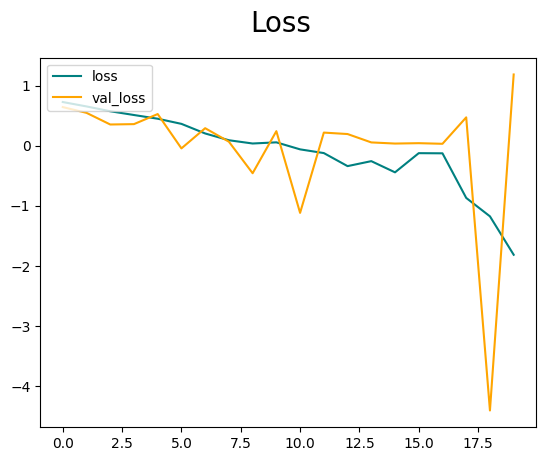

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

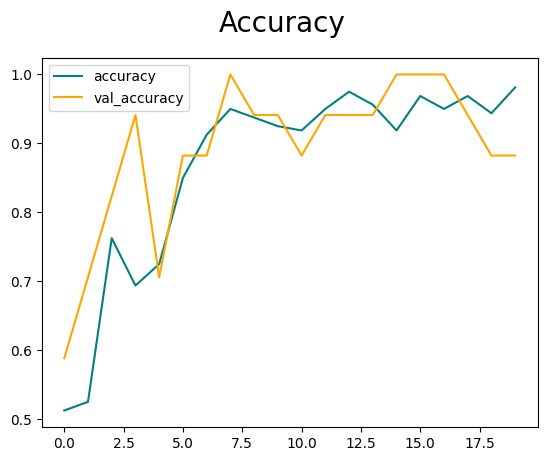

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate Performance**

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [50]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{ acc.result().numpy()}')

Precision:0.0, Recall:0.0,Accuracy:0.0


Test

In [53]:
import cv2

In [54]:
img_path = '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Data/test_data/cute_dog.jpg'

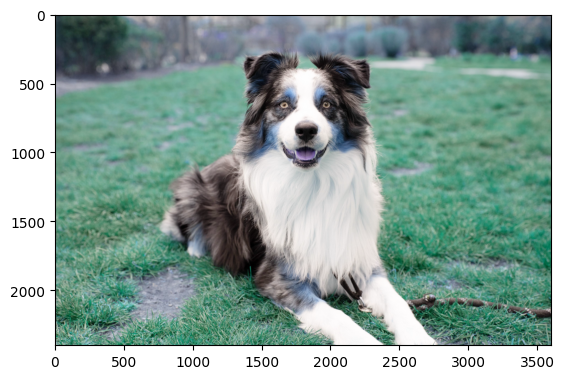

In [56]:
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

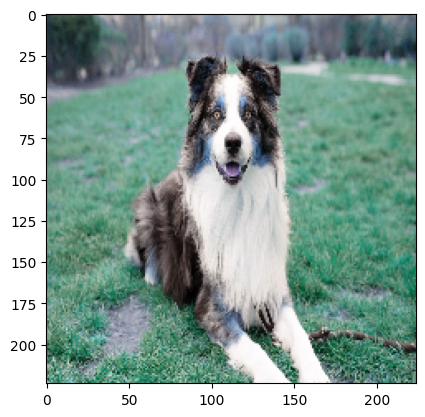

In [57]:
resize = tf.image.resize(img, (224,224)) # Resize to 224x224 to match model input
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
np.expand_dims(resize, 0)

array([[[[ 48.857143 ,  64.85715  ,  71.85715  ],
         [ 38.045918 ,  57.045918 ,  62.045918 ],
         [ 42.811226 ,  65.84693  ,  66.4898   ],
         ...,
         [118.75963  , 120.43834  , 131.11705  ],
         [125.53568  , 127.198975 , 135.87239  ],
         [131.14763  , 130.14763  , 139.14763  ]],

        [[ 58.30612  ,  73.16326  ,  79.591835 ],
         [ 44.959183 ,  62.244896 ,  67.81632  ],
         [ 49.653057 ,  70.08163  ,  71.21938  ],
         ...,
         [ 95.10156  , 105.096405 , 118.821014 ],
         [113.90301  , 121.68879  , 129.83165  ],
         [111.55092  , 119.265205 , 129.69377  ]],

        [[ 60.698982 ,  74.69898  ,  80.69898  ],
         [ 48.40306  ,  64.40306  ,  70.40306  ],
         [ 52.045918 ,  72.04591  ,  73.04591  ],
         ...,
         [ 91.87207  , 104.22949  , 118.22949  ],
         [ 95.94901  , 107.94901  , 119.94901  ],
         [ 99.71429  , 111.250175 , 124.1784   ]],

        ...,

        [[ 70.51699  ,  97.10868  ,  9

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [60]:
yhat

array([[0.19712114]], dtype=float32)

In [62]:
if yhat > 0.5:
    print(f'Predicted class is Cat')
else:
    print(f'Predicted class is Dog')

Predicted class is Dog


**Save the Model**

In [63]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','imageclassifier.h5'))

In [69]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [73]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [74]:
if yhatnew > 0.5:
    print(f'Predicted class is Cat')
else:
    print(f'Predicted class is Dog')

Predicted class is Dog
